In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


In [2]:
df=pd.read_csv("D:\After arriving at PG\About university\Applied Machine Learning\Assignment2\dataset.csv")

# Dataset Exploration

In [3]:
df.shape

(3360, 25)

In [4]:
df.head()

,ID,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,level
0,27,10345300,10345257,10345174,60,52,5871778,5870638,517262.850000,470235.181800,...,1.022685e+06,4092108,4981436.0,5870764,1257699.719,3435979,4653308.5,5870638,1721563.889,CHAT
1,28,14966353,14966200,14966053,7,0,635321,635242,10502.596490,5615.779737,...,2.134758e+04,-1,0.0,-1,0.000,-1,0.0,-1,0.000,VIDEO-STREAMING
2,29,272867,233627,272820,20303,19353,213324,253467,116813.500000,136410.000000,...,9.018174e+04,-1,0.0,-1,0.000,-1,0.0,-1,0.000,CHAT
3,30,14999391,14998887,14999391,0,0,149034,146556,9062.771601,4758.690038,...,9.995782e+03,-1,0.0,-1,0.000,-1,0.0,-1,0.000,VIDEO-STREAMING
4,31,7190597,7189947,7190597,116,492,6555090,6594711,898743.375000,898824.625000,...,1.582350e+06,7051063,7051063.0,7051063,0.000,6555090,6555090.0,6555090,0.000,CHAT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3360 non-null   int64  
 1   duration            3360 non-null   int64  
 2   total_fiat          3360 non-null   int64  
 3   total_biat          3360 non-null   int64  
 4   min_fiat            3360 non-null   int64  
 5   min_biat            3360 non-null   int64  
 6   max_fiat            3360 non-null   int64  
 7   max_biat            3360 non-null   int64  
 8   mean_fiat           3360 non-null   float64
 9   mean_biat           3360 non-null   float64
 10  flowPktsPerSecond   3360 non-null   float64
 11  flowBytesPerSecond  3360 non-null   float64
 12  min_flowiat         3360 non-null   int64  
 13  max_flowiat         3360 non-null   int64  
 14  mean_flowiat        3360 non-null   float64
 15  std_flowiat         3360 non-null   float64
 16  min_ac

In [6]:
df.level.value_counts(normalize=True)

VOIP               0.449107
VIDEO-STREAMING    0.177976
FILE-TRANSFER      0.142857
CHAT               0.072321
BROWSING           0.067560
EMAIL              0.055357
P2P                0.021131
AUDIO-STREAMING    0.013690
Name: level, dtype: float64

In [7]:
replace_values={"VIDEO-STREAMING":"VIDEO","FILE-TRANSFER":"FT","BROWSING":"BRS","AUDIO-STREAMING":"AUDIO"}
df["level"]=df["level"].replace(replace_values)

<Axes: xlabel='level', ylabel='Density'>

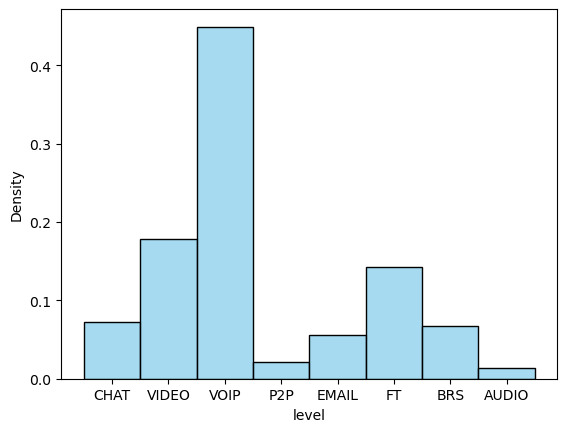

In [8]:
sns.histplot(df["level"],stat="density",color="skyblue")

In [9]:
df.describe()

,ID,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,3360.000000,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,...,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03
mean,1706.500000,1.356211e+07,1.355511e+07,1.355472e+07,4.337456e+04,4.125315e+04,1.526924e+06,1.527076e+06,2.296264e+05,2.205781e+05,...,9.804243e+04,2.656842e+05,1.639119e+06,1.916310e+06,2.231858e+06,3.609768e+05,1.012692e+06,1.179709e+06,1.375025e+06,2.191653e+05
std,970.092779,3.503985e+06,3.502845e+06,3.504760e+06,5.622783e+05,5.618250e+05,2.701687e+06,2.703591e+06,8.117261e+05,7.964531e+05,...,3.121342e+05,7.428597e+05,3.360351e+06,3.517973e+06,3.882475e+06,1.081589e+06,2.373900e+06,2.491386e+06,2.768790e+06,7.807066e+05
min,27.000000,4.200000e+01,0.000000e+00,0.000000e+00,-1.700000e+02,-1.820000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,866.750000,1.472998e+07,1.471444e+07,1.472245e+07,0.000000e+00,0.000000e+00,1.048865e+05,1.035948e+05,1.116668e+04,1.097598e+04,...,5.562988e+03,1.470280e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1706.500000,1.497369e+07,1.496178e+07,1.496538e+07,2.300000e+01,1.600000e+01,1.837355e+05,1.876775e+05,2.819730e+04,2.664199e+04,...,1.382950e+04,2.167968e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,2546.250000,1.498970e+07,1.498656e+07,1.498729e+07,1.520000e+02,2.082500e+02,1.496822e+06,1.497688e+06,4.440556e+04,4.147447e+04,...,1.986335e+04,8.039103e+04,1.799544e+06,3.010871e+06,3.973798e+06,0.000000e+00,1.122714e+06,1.380931e+06,1.489463e+06,0.000000e+00
max,3386.000000,1.500000e+07,1.500000e+07,1.500000e+07,1.497834e+07,1.497799e+07,1.497834e+07,1.497799e+07,1.500000e+07,1.500000e+07,...,4.992779e+06,8.647448e+06,1.499429e+07,1.500000e+07,1.499429e+07,8.479496e+06,1.497799e+07,1.500000e+07,1.497799e+07,7.743548e+06


<Axes: xlabel='level', ylabel='duration'>

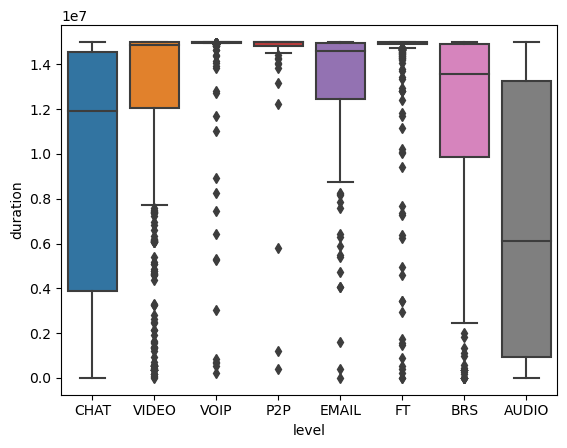

In [10]:
sns.boxplot(x="level", y="duration",data=df)

<Axes: xlabel='duration', ylabel='Density'>

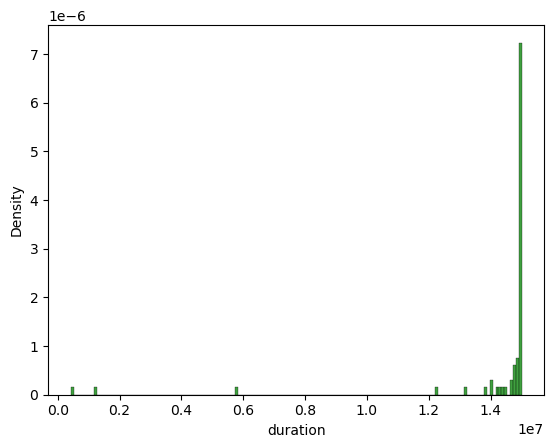

In [11]:
sns.histplot(df[df["level"]=="P2P"]["duration"],stat="density",color="green")

<Axes: xlabel='duration', ylabel='Density'>

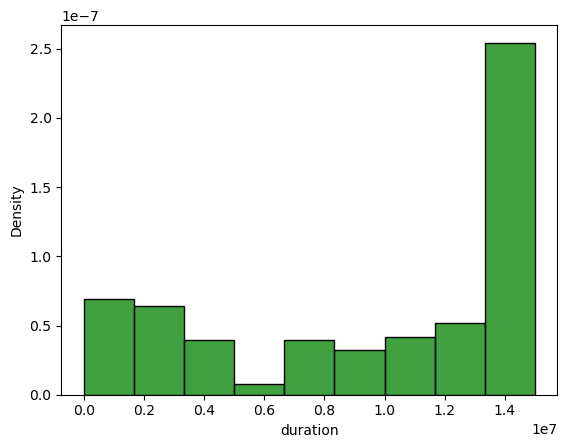

In [12]:
sns.histplot(df[df["level"]=="CHAT"]["duration"],stat="density",color="green")

<Axes: xlabel='level', ylabel='flowBytesPerSecond'>

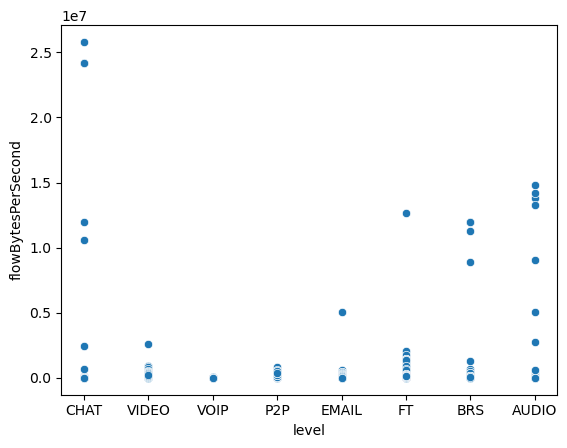

In [13]:
sns.scatterplot(x="level", y="flowBytesPerSecond",data=df)

<Axes: xlabel='level', ylabel='flowPktsPerSecond'>

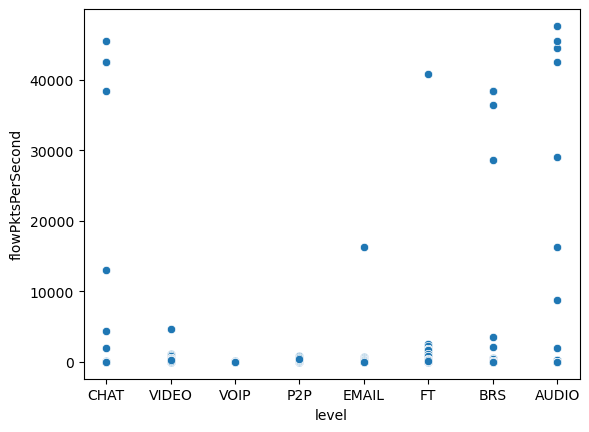

In [14]:
sns.scatterplot(x="level", y="flowPktsPerSecond",data=df)

In [15]:
# Label encoding
le = LabelEncoder()
df['NUM_level']= le.fit_transform(df['level'])

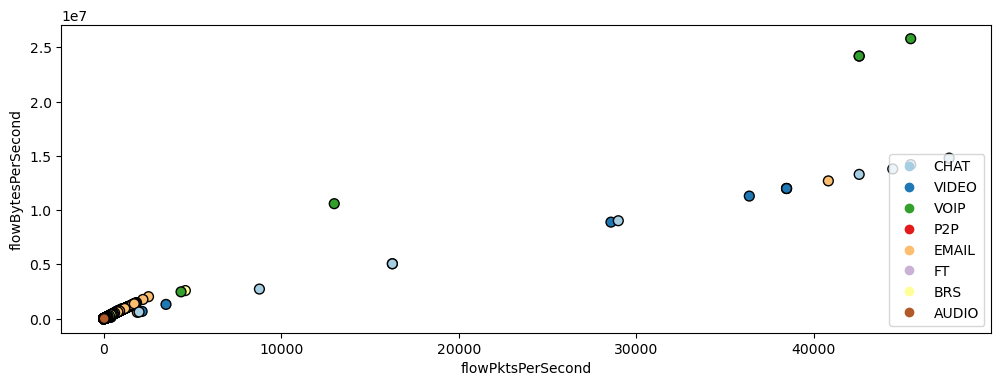

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

p1 = plt.scatter(df.loc[:, "flowPktsPerSecond"], df.loc[:,"flowBytesPerSecond"], c=df['NUM_level'],
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('flowPktsPerSecond')
plt.ylabel('flowBytesPerSecond')
plt.legend(handles=p1.legend_elements()[0], labels=df['level'].unique().tolist(), loc='lower right')

<Axes: xlabel='level', ylabel='max_idle'>

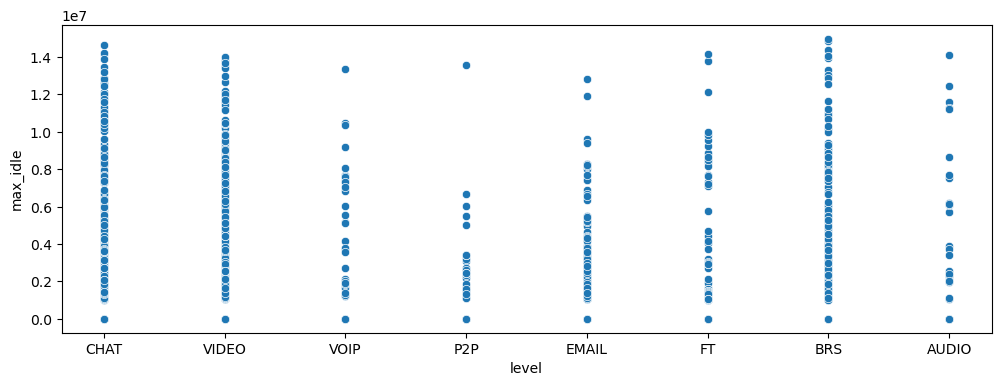

In [17]:
sns.scatterplot(x="level", y="max_idle",data=df)

<Axes: xlabel='level', ylabel='min_fiat'>

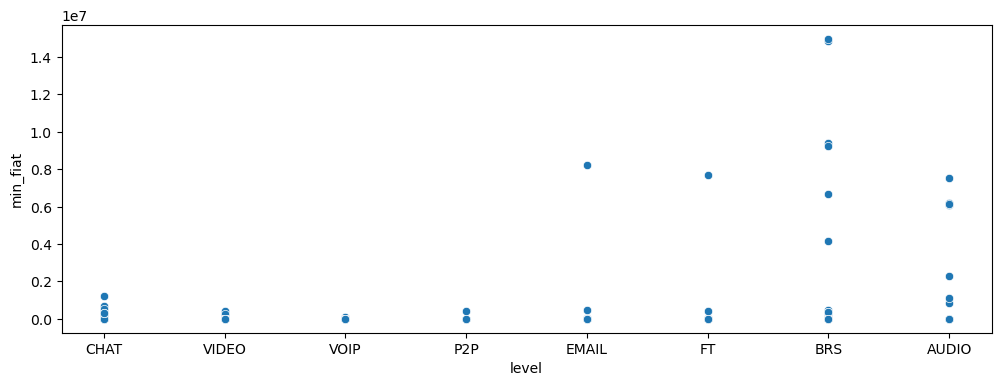

In [18]:
sns.scatterplot(x="level", y="min_fiat",data=df)

<Axes: xlabel='level', ylabel='min_biat'>

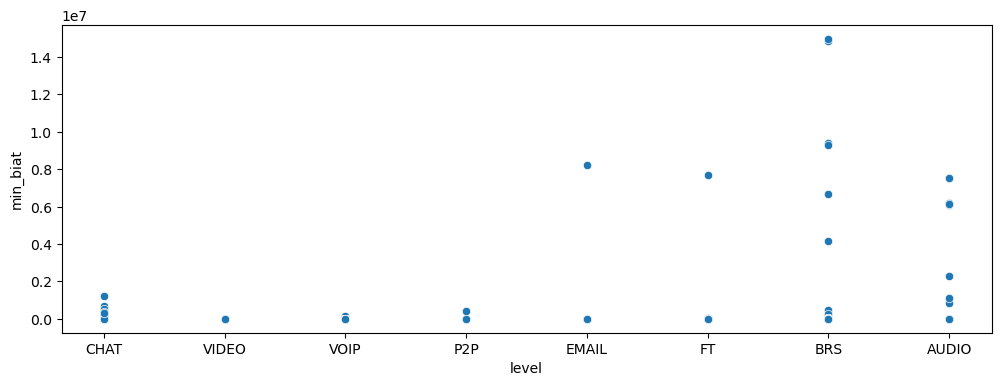

In [19]:
sns.scatterplot(x="level", y="min_biat",data=df)

            NUM_level  mean_fiat  max_fiat  min_fiat  total_fiat
NUM_level    1.000000  -0.304268 -0.436059 -0.145150    0.392607
mean_fiat   -0.304268   1.000000  0.633894  0.701861   -0.204639
max_fiat    -0.436059   0.633894  1.000000  0.188084   -0.138011
min_fiat    -0.145150   0.701861  0.188084  1.000000   -0.112416
total_fiat   0.392607  -0.204639 -0.138011 -0.112416    1.000000


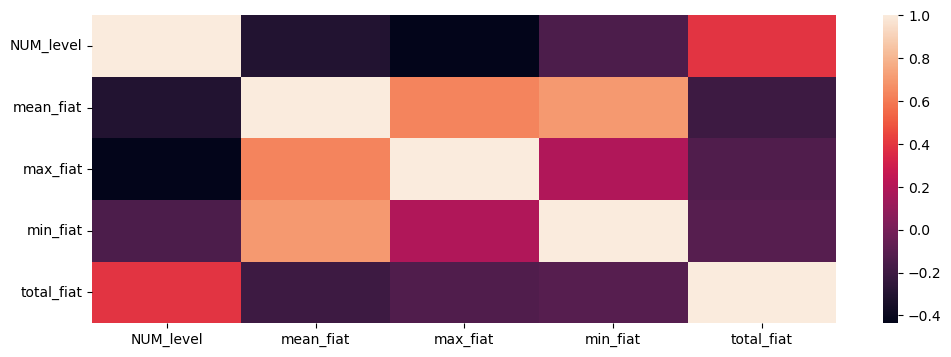

In [20]:
corr_matrix = df.loc[:,("NUM_level","mean_fiat","max_fiat","min_fiat","total_fiat",)].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

            NUM_level  mean_biat  max_biat  min_biat  total_biat
NUM_level    1.000000  -0.311693 -0.435814 -0.145873    0.392586
mean_biat   -0.311693   1.000000  0.621620  0.712062   -0.196209
max_biat    -0.435814   0.621620  1.000000  0.186329   -0.138294
min_biat    -0.145873   0.712062  0.186329  1.000000   -0.101312
total_biat   0.392586  -0.196209 -0.138294 -0.101312    1.000000


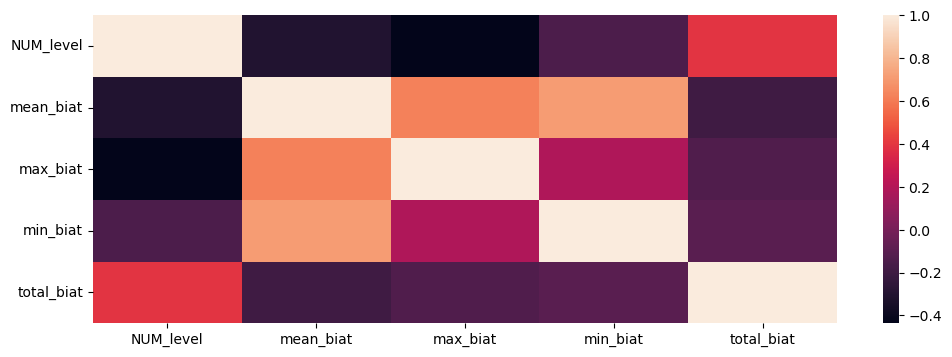

In [21]:
corr_matrix = df.loc[:,("NUM_level","mean_biat","max_biat","min_biat","total_biat")].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

              NUM_level  mean_flowiat  max_flowiat  min_flowiat  std_flowiat
NUM_level      1.000000     -0.327096    -0.435783    -0.052605    -0.351788
mean_flowiat  -0.327096      1.000000     0.685162     0.006834     0.959597
max_flowiat   -0.435783      0.685162     1.000000    -0.010184     0.823779
min_flowiat   -0.052605      0.006834    -0.010184     1.000000     0.000580
std_flowiat   -0.351788      0.959597     0.823779     0.000580     1.000000


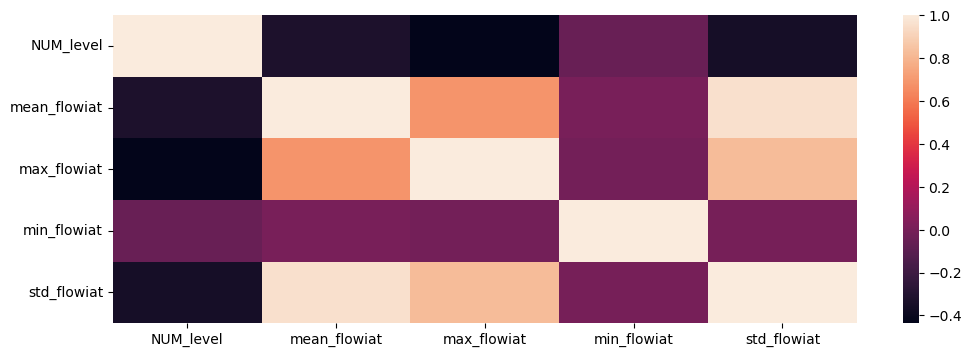

In [22]:
corr_matrix = df.loc[:,("NUM_level","mean_flowiat","max_flowiat","min_flowiat","std_flowiat")].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

             NUM_level  mean_active  max_active  min_active  std_active
NUM_level     1.000000    -0.409862   -0.445507   -0.357998   -0.284722
mean_active  -0.409862     1.000000    0.973938    0.974129    0.305397
max_active   -0.445507     0.973938    1.000000    0.900092    0.504566
min_active   -0.357998     0.974129    0.900092    1.000000    0.085396
std_active   -0.284722     0.305397    0.504566    0.085396    1.000000


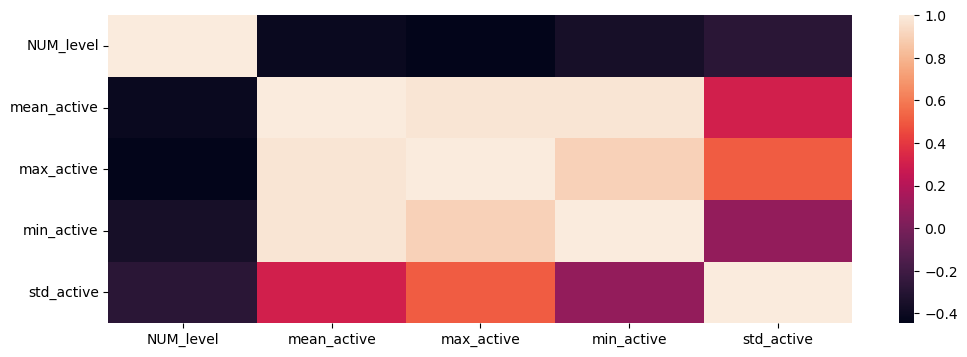

In [23]:
corr_matrix = df.loc[:,("NUM_level","mean_active","max_active","min_active","std_active")].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

           NUM_level  mean_idle  max_idle  min_idle  std_idle
NUM_level   1.000000  -0.386436 -0.421442 -0.335142 -0.279009
mean_idle  -0.386436   1.000000  0.972191  0.973618  0.312639
max_idle   -0.421442   0.972191  1.000000  0.896101  0.516911
min_idle   -0.335142   0.973618  0.896101  1.000000  0.090466
std_idle   -0.279009   0.312639  0.516911  0.090466  1.000000


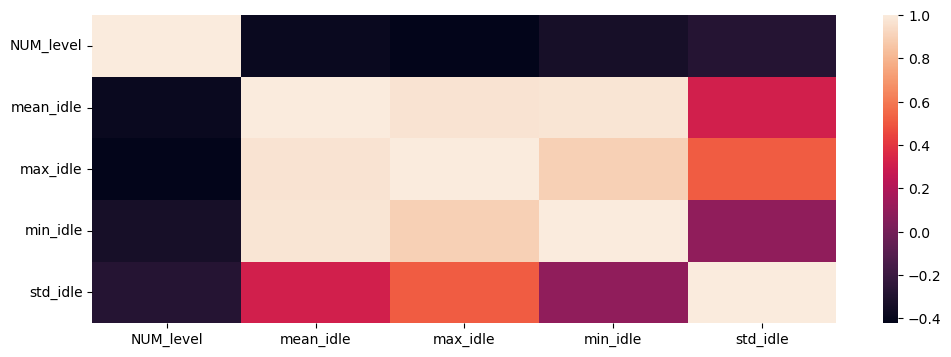

In [24]:
corr_matrix = df.loc[:,("NUM_level","mean_idle","max_idle","min_idle","std_idle")].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

                    NUM_level  flowPktsPerSecond  flowBytesPerSecond  duration
NUM_level            1.000000          -0.149069           -0.155186  0.392256
flowPktsPerSecond   -0.149069           1.000000            0.949832 -0.256573
flowBytesPerSecond  -0.155186           0.949832            1.000000 -0.224952
duration             0.392256          -0.256573           -0.224952  1.000000


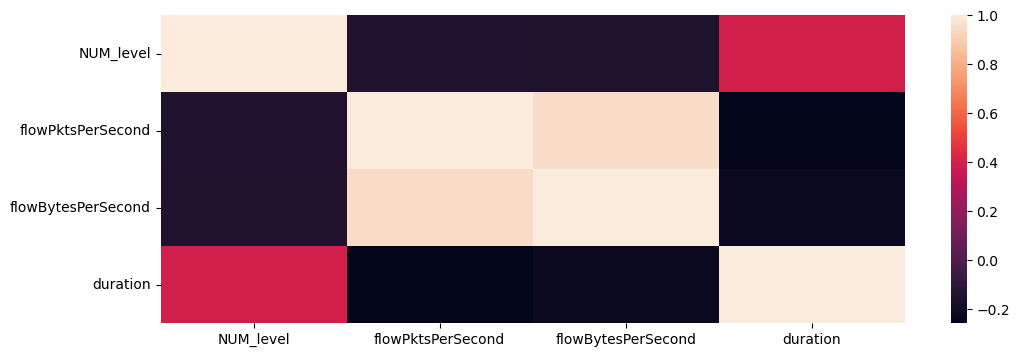

In [25]:
corr_matrix = df.loc[:,("NUM_level","flowPktsPerSecond","flowBytesPerSecond","duration")].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

             NUM_level  max_biat  max_fiat  max_flowiat
NUM_level     1.000000 -0.435814 -0.436059    -0.435783
max_biat     -0.435814  1.000000  0.999979     0.999989
max_fiat     -0.436059  0.999979  1.000000     0.999991
max_flowiat  -0.435783  0.999989  0.999991     1.000000


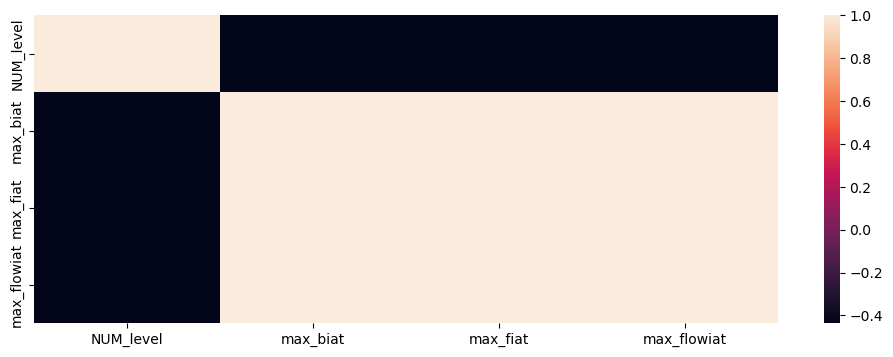

In [26]:
corr_matrix = df.loc[:,("NUM_level","max_biat","max_fiat","max_flowiat")].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)

In [27]:
df.drop(columns=["NUM_level"],inplace=True)

# Data Preparation

In [28]:
df.drop(columns=["ID"],inplace=True)

In [29]:
feature_names =df.iloc[:,:-1].columns.tolist()

In [30]:
X = df.iloc[:, :-1].values
Y= df.iloc[:, -1].values

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = True,stratify=Y)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## _feature analysis

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif

selector = SelectKBest(mutual_info_classif, k="all")
X_train_cfs = selector.fit_transform(X_train, Y_train)
X_test_cfs = selector.transform(X_test)

feature_scores = selector.scores_
feature_dict={}

for feature, (name, score) in enumerate(zip(feature_names, feature_scores)):   
    feature_dict[name]=score
    
from collections import OrderedDict
sorted_dict = OrderedDict(sorted(feature_dict.items(), key=lambda item: item[1],reverse=True))

selector = SelectKBest(mutual_info_classif, k=12)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

## _imbalance samples processing

In [34]:
pd.DataFrame(Y_train,columns=["level"]).value_counts()

level
VOIP     1207
VIDEO     478
FT        384
CHAT      194
BRS       182
EMAIL     149
P2P        57
AUDIO      37
dtype: int64

###  apporach 1: over-sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_01, Y_resampled_01 = ros.fit_resample(X_train, Y_train)
pd.DataFrame(Y_resampled_01,columns=["level"]).value_counts()

level
AUDIO    1207
BRS      1207
CHAT     1207
EMAIL    1207
FT       1207
P2P      1207
VIDEO    1207
VOIP     1207
dtype: int64

### apporach 2:under-sampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_02, Y_resampled_02 = rus.fit_resample(X_train, Y_train)
pd.DataFrame(Y_resampled_02,columns=["level"]).value_counts()

level
AUDIO    37
BRS      37
CHAT     37
EMAIL    37
FT       37
P2P      37
VIDEO    37
VOIP     37
dtype: int64

# Model Building
##  ___Selectig models

In [37]:
def selecting_model(clf,X,Y):   
    scores_precision_macro = cross_val_score(clf, X,Y, cv=10, scoring='precision_macro')
    scores_f1_macro = cross_val_score(clf, X,Y, cv=10, scoring='f1_macro')
    scores_precision_weighted = cross_val_score(clf, X,Y, cv=10, scoring='precision_weighted')
    scores_f1_weighted= cross_val_score(clf, X,Y, cv=10, scoring='f1_weighted')
#    print(f"macro average precision:{scores_precision_macro.mean():.2f}")
#    print(f"macro average f1:{scores_f1_macro.mean():.2f}\n")
    print(f"weighted average precision:{scores_precision_weighted.mean():.2f}")
    print(f"weighted average f1:{scores_f1_weighted.mean():.2f}")

In [38]:
from sklearn.naive_bayes import GaussianNB
GSNB=GaussianNB()
selecting_model(GSNB,X,Y)

weighted average precision:0.61
weighted average f1:0.58


In [39]:
from sklearn.svm import SVC
SVC= SVC(kernel='poly',degree=3,coef0=2, class_weight='balanced', random_state=42)
selecting_model(SVC,X,Y)

weighted average precision:0.64
weighted average f1:0.60


In [40]:
from sklearn import neighbors
KNN=neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
selecting_model(KNN,X,Y)

weighted average precision:0.70
weighted average f1:0.69


In [41]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(class_weight='balanced', random_state=42)
selecting_model(RFC,X,Y)

weighted average precision:0.81
weighted average f1:0.80


# _Training models and Evaluation

### _RandomForestClassifier_ all features

In [42]:
RFC = RandomForestClassifier(class_weight='balanced',criterion="gini", random_state=42)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.43      0.33      0.38         9
         BRS       0.49      0.40      0.44        45
        CHAT       0.54      0.76      0.63        49
       EMAIL       0.72      0.57      0.64        37
          FT       0.86      0.86      0.86        96
         P2P       0.78      0.50      0.61        14
       VIDEO       0.71      0.77      0.74       120
        VOIP       1.00      0.98      0.99       302

    accuracy                           0.83       672
   macro avg       0.69      0.65      0.66       672
weighted avg       0.83      0.83      0.83       672



### RandomForestClassifier_ selected features

In [43]:
RFC = RandomForestClassifier(class_weight='balanced',
                             criterion="gini", random_state=42)
RFC.fit(X_train_selected, Y_train)
Y_pred = RFC.predict(X_test_selected)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.50      0.33      0.40         9
         BRS       0.44      0.42      0.43        45
        CHAT       0.61      0.78      0.68        49
       EMAIL       0.67      0.59      0.63        37
          FT       0.87      0.88      0.87        96
         P2P       0.75      0.64      0.69        14
       VIDEO       0.74      0.75      0.75       120
        VOIP       0.99      0.98      0.99       302

    accuracy                           0.83       672
   macro avg       0.70      0.67      0.68       672
weighted avg       0.84      0.83      0.83       672



### KNeighborsClassifier_all features

In [44]:
KNN=neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.27      0.33      0.30         9
         BRS       0.44      0.49      0.46        45
        CHAT       0.53      0.51      0.52        49
       EMAIL       0.40      0.49      0.44        37
          FT       0.73      0.75      0.74        96
         P2P       0.38      0.21      0.27        14
       VIDEO       0.58      0.57      0.58       120
        VOIP       1.00      0.97      0.98       302

    accuracy                           0.75       672
   macro avg       0.54      0.54      0.54       672
weighted avg       0.76      0.75      0.75       672



### KNeighborsClassifier_selected features

In [45]:
KNN=neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_train_selected, Y_train)
Y_pred = KNN.predict(X_test_selected)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.27      0.33      0.30         9
         BRS       0.31      0.33      0.32        45
        CHAT       0.44      0.57      0.50        49
       EMAIL       0.39      0.49      0.43        37
          FT       0.73      0.78      0.75        96
         P2P       0.33      0.14      0.20        14
       VIDEO       0.53      0.45      0.49       120
        VOIP       1.00      0.96      0.98       302

    accuracy                           0.72       672
   macro avg       0.50      0.51      0.50       672
weighted avg       0.73      0.72      0.72       672



## _Fine tune to identify the promising models

### RF fine-tuning using selected features

In [46]:
RFC = RandomForestClassifier(class_weight='balanced',criterion="entropy",
                             min_samples_split=3, random_state=42)
RFC.fit(X_train_selected, Y_train)
Y_pred = RFC.predict(X_test_selected)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.60      0.33      0.43         9
         BRS       0.47      0.49      0.48        45
        CHAT       0.58      0.73      0.65        49
       EMAIL       0.71      0.59      0.65        37
          FT       0.91      0.91      0.91        96
         P2P       0.67      0.57      0.62        14
       VIDEO       0.77      0.79      0.78       120
        VOIP       1.00      0.98      0.99       302

    accuracy                           0.85       672
   macro avg       0.71      0.67      0.69       672
weighted avg       0.85      0.85      0.85       672



### KNN fine-tuning using all features

In [47]:
KNN=neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_resampled_01, Y_resampled_01)
Y_pred = KNN.predict(X_test)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.20      0.22      0.21         9
         BRS       0.38      0.53      0.44        45
        CHAT       0.43      0.45      0.44        49
       EMAIL       0.42      0.49      0.45        37
          FT       0.70      0.72      0.71        96
         P2P       0.17      0.21      0.19        14
       VIDEO       0.52      0.42      0.46       120
        VOIP       1.00      0.96      0.98       302

    accuracy                           0.71       672
   macro avg       0.48      0.50      0.49       672
weighted avg       0.73      0.71      0.72       672



In [48]:
KNN=neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_resampled_02, Y_resampled_02)
Y_pred = KNN.predict(X_test)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.11      0.56      0.18         9
         BRS       0.26      0.31      0.28        45
        CHAT       0.30      0.35      0.32        49
       EMAIL       0.36      0.54      0.43        37
          FT       0.76      0.69      0.72        96
         P2P       0.16      0.57      0.25        14
       VIDEO       0.63      0.16      0.25       120
        VOIP       1.00      0.96      0.98       302

    accuracy                           0.65       672
   macro avg       0.45      0.52      0.43       672
weighted avg       0.73      0.65      0.66       672



In [49]:
KNN=neighbors.KNeighborsClassifier(n_neighbors=7,weights='distance'
                                   ,metric='minkowski',p=1)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
report=classification_report(Y_test, Y_pred)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.40      0.22      0.29         9
         BRS       0.53      0.40      0.46        45
        CHAT       0.45      0.45      0.45        49
       EMAIL       0.59      0.54      0.56        37
          FT       0.73      0.80      0.76        96
         P2P       0.57      0.29      0.38        14
       VIDEO       0.55      0.65      0.60       120
        VOIP       1.00      0.97      0.98       302

    accuracy                           0.77       672
   macro avg       0.60      0.54      0.56       672
weighted avg       0.77      0.77      0.76       672



# Prediction and Evaluation

In [50]:
Y_pred_KNN = KNN.predict(X_test)
report=classification_report(Y_test, Y_pred_KNN)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.40      0.22      0.29         9
         BRS       0.53      0.40      0.46        45
        CHAT       0.45      0.45      0.45        49
       EMAIL       0.59      0.54      0.56        37
          FT       0.73      0.80      0.76        96
         P2P       0.57      0.29      0.38        14
       VIDEO       0.55      0.65      0.60       120
        VOIP       1.00      0.97      0.98       302

    accuracy                           0.77       672
   macro avg       0.60      0.54      0.56       672
weighted avg       0.77      0.77      0.76       672



<Axes: >

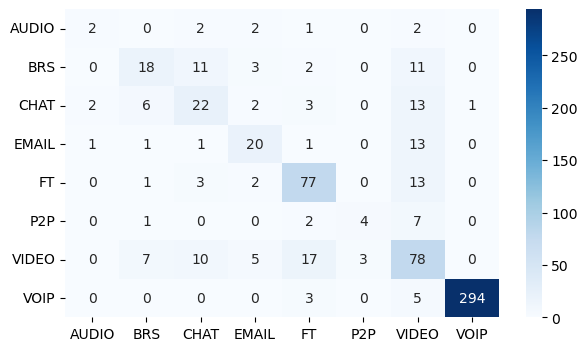

In [51]:
# Confusion matrix——KNN

cf_matrix = confusion_matrix(Y_test, Y_pred_KNN)
class_labels = sorted(set(Y_test))
plt.figure(figsize=(7, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)


In [52]:
Y_pred_RFC = RFC.predict(X_test_selected)
report=classification_report(Y_test, Y_pred_RFC)
print(f'Classification Report: \n{report}')

Classification Report: 
              precision    recall  f1-score   support

       AUDIO       0.60      0.33      0.43         9
         BRS       0.47      0.49      0.48        45
        CHAT       0.58      0.73      0.65        49
       EMAIL       0.71      0.59      0.65        37
          FT       0.91      0.91      0.91        96
         P2P       0.67      0.57      0.62        14
       VIDEO       0.77      0.79      0.78       120
        VOIP       1.00      0.98      0.99       302

    accuracy                           0.85       672
   macro avg       0.71      0.67      0.69       672
weighted avg       0.85      0.85      0.85       672



<Axes: >

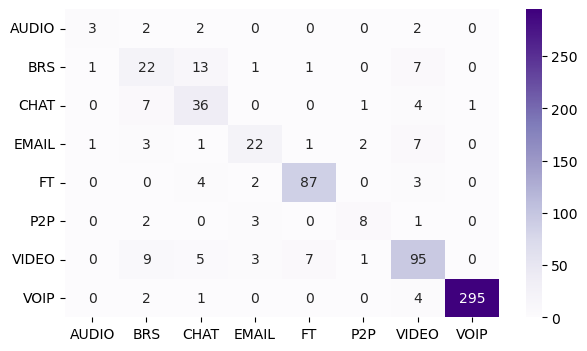

In [53]:
# Confusion matrix——RandomForest
cf_matrix = confusion_matrix(Y_test, Y_pred_RFC)
class_labels = sorted(set(Y_test))
plt.figure(figsize=(7, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples', 
            xticklabels=class_labels, yticklabels=class_labels)